In [1]:
#!pip install yfinance
#!pip install yfinance --upgrade
#!pip install --upgrade pandas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

c:\Users\Tashm\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Define the ticker symbol and timeframe
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Create a Ticker object and fetch data
try:
    df = yf.Ticker(ticker_symbol).history(start=start_date, end=end_date, actions=True)
except Exception as e:
    print("Error fetching data:", e)

In [3]:
df.head()  

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.437014,6.469285,6.405346,6.454506,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.472300,6.502158,6.431584,6.465665,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.465663,6.491299,6.356182,6.362818,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.386344,6.393884,6.304912,6.351056,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.342611,6.393883,6.305214,6.393280,447610800,0.0,0.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-31 00:00:00-04:00,229.339996,229.830002,225.369995,225.910004,64370100,0.0,0.0
2024-11-01 00:00:00-04:00,220.970001,225.350006,220.270004,222.910004,65276700,0.0,0.0
2024-11-04 00:00:00-05:00,220.990005,222.789993,219.710007,222.009995,44944500,0.0,0.0
2024-11-05 00:00:00-05:00,221.800003,223.949997,221.139999,223.449997,28111300,0.0,0.0
2024-11-06 00:00:00-05:00,222.610001,226.070007,221.190002,222.720001,54495200,0.0,0.0


In [5]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.437014,6.469285,6.405346,6.454506,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.472300,6.502158,6.431584,6.465665,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.465663,6.491299,6.356182,6.362818,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.386344,6.393884,6.304912,6.351056,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.342611,6.393883,6.305214,6.393280,447610800,0.0,0.0


In [6]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,6.437014,6.469285,6.405346,6.454506,493729600,0.0,0.0
1,6.472300,6.502158,6.431584,6.465665,601904800,0.0,0.0
2,6.465663,6.491299,6.356182,6.362818,552160000,0.0,0.0
3,6.386344,6.393884,6.304912,6.351056,477131200,0.0,0.0
4,6.342611,6.393883,6.305214,6.393280,447610800,0.0,0.0


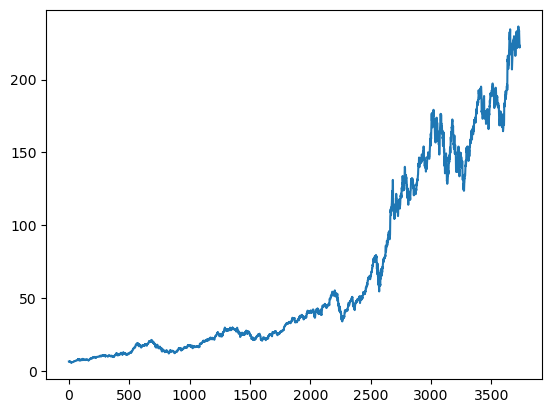

In [7]:
plt.plot(df.Close)


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3732    223.233002
3733    223.392997
3734    223.484860
3735    223.579437
3736    223.684194
Name: Close, Length: 3737, dtype: float64

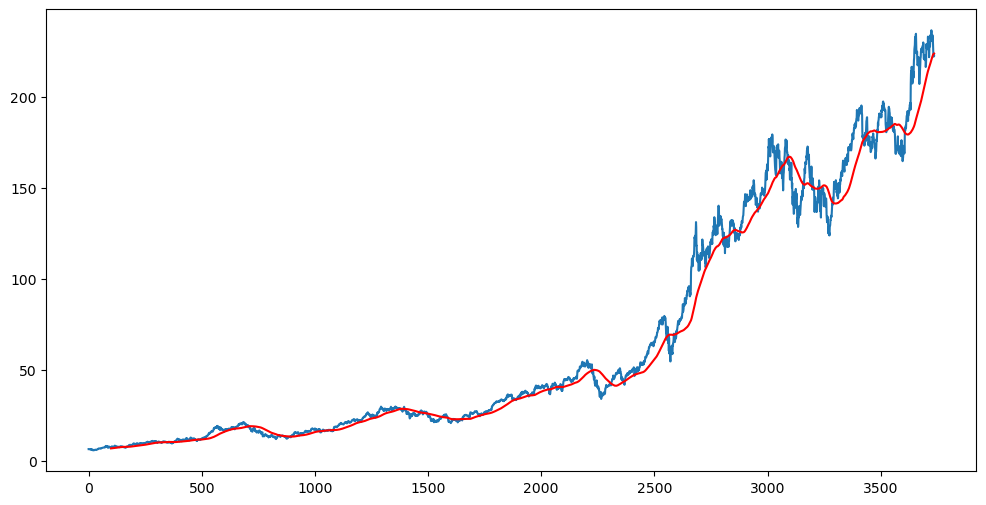

In [9]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3732    201.709141
3733    201.884107
3734    202.039978
3735    202.191442
3736    202.332832
Name: Close, Length: 3737, dtype: float64

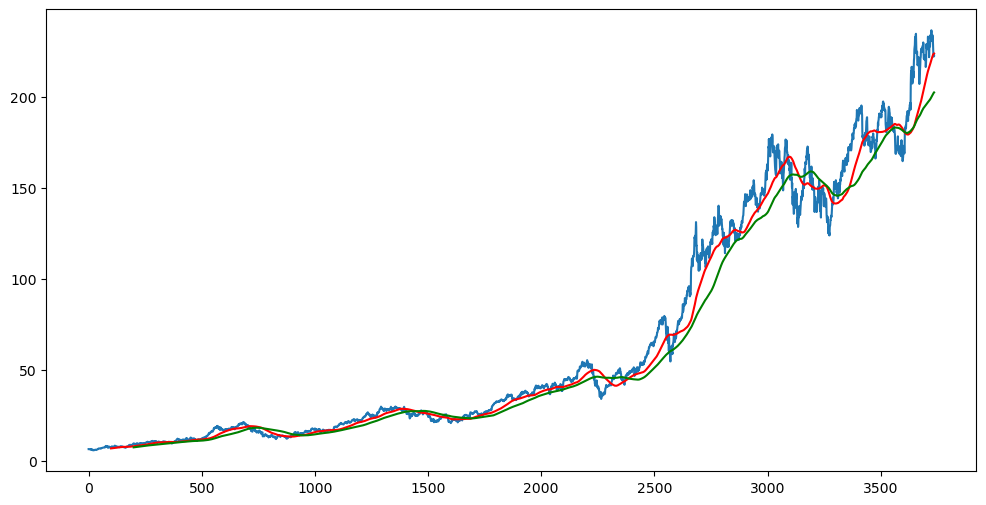

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

## Splitting data into training and testing

In [12]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

In [13]:
print(data_training.shape)
print(data_testing.shape)


(2615, 1)
(1122, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array
data_training_array.shape

(2615, 1)

In [16]:
x_train = []
y_train = []


In [17]:
for i in range(100, data_training_array.shape[0]):
 x_train.append(data_training_array[i-100: i])
 y_train.append(data_training_array[i, 0])
 
x_train, y_train = np.array(x_train), np.array(y_train)

## ML Modelling

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
 input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
79/79 [==============================] - 39s 371ms/step - loss: 0.0238
Epoch 2/50
79/79 [==============================] - 23s 290ms/step - loss: 0.0052
Epoch 3/50
79/79 [==============================] - 26s 331ms/step - loss: 0.0046
Epoch 4/50
79/79 [==============================] - 24s 309ms/step - loss: 0.0046
Epoch 5/50
79/79 [==============================] - 24s 308ms/step - loss: 0.0043
Epoch 6/50
79/79 [==============================] - 26s 325ms/step - loss: 0.0039
Epoch 7/50
79/79 [==============================] - 27s 347ms/step - loss: 0.0038
Epoch 8/50
79/79 [==============================] - 26s 324ms/step - loss: 0.0030
Epoch 9/50
79/79 [==============================] - 26s 330ms/step - loss: 0.0032
Epoch 10/50
79/79 [==============================] - 26s 325ms/step - loss: 0.0027
Epoch 11/50
79/79 [==============================] - 27s 348ms/step - loss: 0.0026
Epoch 12/50
79/79 [==============================] - 27s 339ms/step - loss: 0.0028
Epoch 13/50
7

In [22]:
model.save('keras_model.keras')

In [23]:
data_testing.head()

,Close
2615,77.241425
2616,77.577950
2617,77.612122
2618,77.536514
2619,78.490028


In [24]:
data_training.tail(100)

,Close
2515,71.250443
2516,72.876106
2517,72.167610
2518,72.742645
2519,72.400543
...,...
2610,76.809776
2611,76.365913
2612,77.851089
2613,77.270699


In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [27]:
final_df.head()


,Close
0,71.250443
1,72.876106
2,72.167610
3,72.742645
4,72.400543


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.09169752],
       [0.10063415],
       [0.09673939],
       ...,
       [0.92045528],
       [0.92837129],
       [0.92435834]])

In [29]:
x_test = []
y_test = []

In [30]:
for i in range(100, input_data.shape[0]):
 x_test.append(input_data[i-100: i])
 y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1122, 100, 1)
(1122,)


## Making Predictions


In [31]:
y_predicted = model.predict(x_test)
y_predicted.shape

36/36 [==============================] - 4s 91ms/step


(1122, 1)

In [32]:
y_test

array([0.12463124, 0.12648119, 0.12666904, ..., 0.92045528, 0.92837129,
       0.92435834])

In [33]:
y_predicted

array([[0.16150971],
       [0.16367215],
       [0.16569585],
       ...,
       [0.89041114],
       [0.8831737 ],
       [0.8747949 ]], dtype=float32)

In [34]:
scaler.scale_

array([0.00549722])

In [35]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

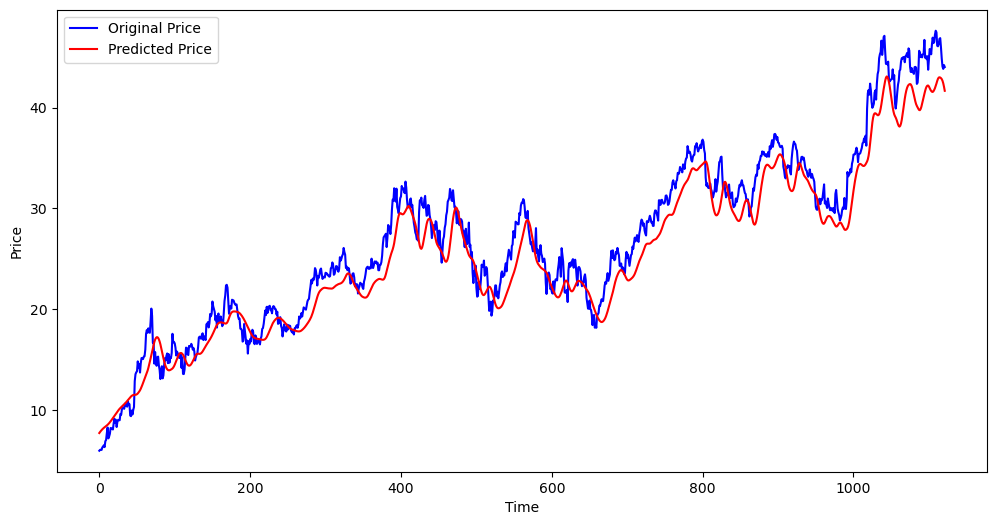

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.title('Original vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price (in USD)')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Mean Absolute Error: 1.9222788423187618
Mean Squared Error: 5.429536493275886
Root Mean Squared Error: 2.3301365825367157
R-squared Score: 0.9293815828340124


In [ ]:
%pip install streamlit